In [17]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2, os

# Load in the data
data = pd.read_csv('../../../driving_log_2020_oct_26.csv',names=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])

In [5]:
X = data[['center', 'left', 'right']].values

In [6]:
X.shape

(447, 3)

In [7]:
IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 160, 320, 3
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

In [8]:
# From 
def load_image(data_dir, image_file):
    """
    Load RGB images from a file
    """
    return mpimg.imread(os.path.join(data_dir+image_file.strip()))

In [9]:
#EXAMPLE: Off-road right
image_num = 0
# Center Images X[0][i] for i in range(447)
print(X[image_num][0])
# Left Images X[0][i] for i in range(447)
print(X[image_num][1])
# Right Images X[0][i] for i in range(447)
print(X[image_num][2])

# File path for each of the three cameras
data_dir_c = X[image_num][0][:-28]
data_dir_l = X[image_num][1][:-28]
data_dir_r = X[image_num][2][:-28]
print(data_dir_c)
print(data_dir_l)
print(data_dir_r)

# First image on Oct 26, 2020 at 4:15:35.712 PST
image_file = X[image_num][0][-28:]
image_file

test_image_c = load_image(data_dir_c, image_file)
test_image_l = load_image(data_dir_l, image_file)
test_image_r = load_image(data_dir_r, image_file)
print(test_image_c.shape)
print(test_image_l.shape)
print(test_image_r.shape)

C:\Users\bgrif\Desktop\dsi\IMG\center_2020_10_26_16_15_35_712.jpg
C:\Users\bgrif\Desktop\dsi\IMG\left_2020_10_26_16_15_35_712.jpg
C:\Users\bgrif\Desktop\dsi\IMG\right_2020_10_26_16_15_35_712.jpg
C:\Users\bgrif\Desktop\dsi\IMG\center
C:\Users\bgrif\Desktop\dsi\IMG\left
C:\Users\bgrif\Desktop\dsi\IMG\right
(160, 320, 3)
(160, 320, 3)
(160, 320, 3)


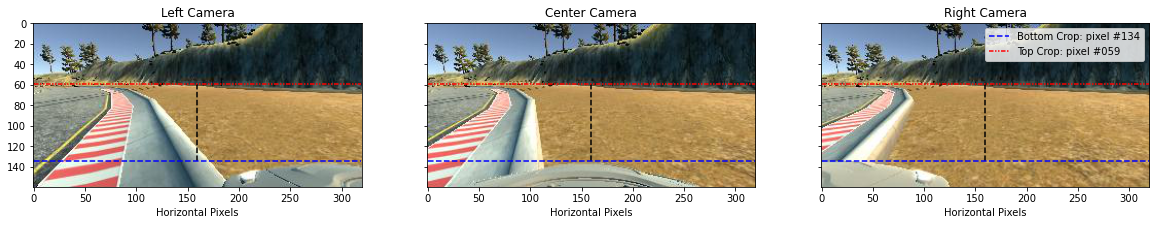

In [10]:
# Consider the distribution of the target: Sale Price. 
# Notice how the distribution approaches Normal after a log transfromation
fig, (ax0, ax1 , ax2) = plt.subplots( nrows=1, ncols=3, sharey=True,  figsize=(20, 4) )

# Plot params
origin = 0
width = IMAGE_WIDTH - 1 # Account for zero indexing
height = IMAGE_HEIGHT - 1 # Account for zero indexing
crop_top = height - 100 # 0 thru 59 croppped in training
crop_btm = height - 25 #Last 25 rows cropped in training
densely_dashdotdotted = (0, (3, 1, 1, 1, 1, 1))

ax0.imshow(test_image_l);
ax1.imshow(test_image_c);
ax2.imshow(test_image_r);

ax0.set( xlabel='Horizontal Pixels', title='Left Camera');
ax1.set( xlabel='Horizontal Pixels', title='Center Camera');
ax2.set( xlabel='Horizontal Pixels', title='Right Camera');

ax0.vlines(x=height, ymin=crop_btm, ymax=crop_top, colors='k', linestyles='--');
ax0.hlines(y=crop_btm, xmin=origin, xmax=width, colors='b', linestyles='--');
ax0.hlines(y=crop_top, xmin=origin, xmax=width, colors='r', linestyles=densely_dashdotdotted);

ax1.vlines(x=height, ymin=crop_btm, ymax=crop_top, colors='k', linestyles='--');
ax1.hlines(y=crop_btm, xmin=origin, xmax=width, colors='b', linestyles='--');
ax1.hlines(y=crop_top, xmin=origin, xmax=width, colors='r', linestyles=densely_dashdotdotted);


# crop(image) utils.py function removes the sky at the top and the car front at the bottom
top =  'Top Crop: pixel #059'
bttm = 'Bottom Crop: pixel #134'

ax2.vlines(x=height, ymin=crop_btm, ymax=crop_top, colors='k', linestyles='--');
ax2.hlines(y=crop_btm, xmin=origin, xmax=width, colors='b', linestyles='--', label=bttm);
ax2.hlines(y=crop_top, xmin=origin, xmax=width, colors='r', linestyles=densely_dashdotdotted, label=top);

#ax0.legend();
#ax1.legend();
ax2.legend();

In [11]:
# EXAMPLE: Curved road
image_num = 20
# File path for each of the three cameras
data_dir_c = X[image_num][0][:-28]
data_dir_l = X[image_num][1][:-28]
data_dir_r = X[image_num][2][:-28]
print(data_dir_c)
print(data_dir_l)
print(data_dir_r)

# First image on Oct 26, 2020 at 4:15:35.712 PST
image_file = X[image_num][0][-28:]
image_file

test_image_c = load_image(data_dir_c, image_file)
test_image_l = load_image(data_dir_l, image_file)
test_image_r = load_image(data_dir_r, image_file)
print(test_image_c.shape)
print(test_image_l.shape)
print(test_image_r.shape)

C:\Users\bgrif\Desktop\dsi\IMG\center
C:\Users\bgrif\Desktop\dsi\IMG\left
C:\Users\bgrif\Desktop\dsi\IMG\right
(160, 320, 3)
(160, 320, 3)
(160, 320, 3)


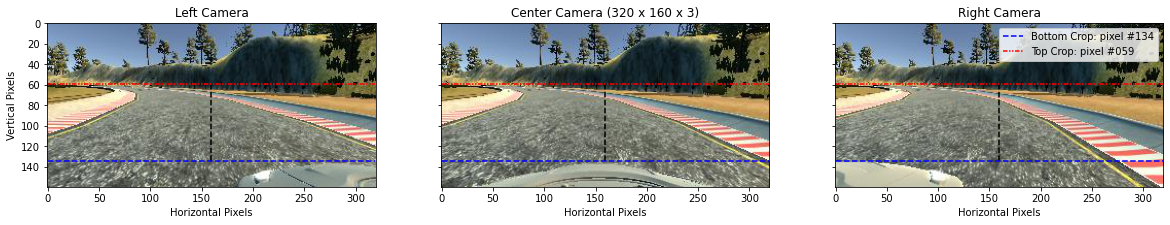

In [12]:
# Consider the distribution of the target: Sale Price. 
# Notice how the distribution approaches Normal after a log transfromation
fig, (ax0, ax1 , ax2) = plt.subplots( nrows=1, ncols=3, sharey=True,  figsize=(20, 4) )

# Plot params
origin = 0
width = IMAGE_WIDTH - 1 # Account for zero indexing
height = IMAGE_HEIGHT - 1 # Account for zero indexing
crop_top = height - 100 # 0 thru 59 croppped in training
crop_btm = height - 25 #Last 25 rows cropped in training
densely_dashdotdotted = (0, (3, 1, 1, 1, 1, 1))

ax0.imshow(test_image_l);
ax1.imshow(test_image_c);
ax2.imshow(test_image_r);

ax0.set( xlabel='Horizontal Pixels', title='Left Camera');
ax1.set( xlabel='Horizontal Pixels', title='Center Camera (320 x 160 x 3)');
ax2.set( xlabel='Horizontal Pixels', title='Right Camera');

ax0.set( ylabel='Vertical Pixels', title='Left Camera');
#ax1.set( ylabel='Vertical Pixels', title='Center Camera');
#ax2.set( ylabel='Vertical Pixels', title='Right Camera');

ax0.vlines(x=height, ymin=crop_btm, ymax=crop_top, colors='k', linestyles='--');
ax0.hlines(y=crop_btm, xmin=origin, xmax=width, colors='b', linestyles='--');
ax0.hlines(y=crop_top, xmin=origin, xmax=width, colors='r', linestyles=densely_dashdotdotted);

ax1.vlines(x=height, ymin=crop_btm, ymax=crop_top, colors='k', linestyles='--');
ax1.hlines(y=crop_btm, xmin=origin, xmax=width, colors='b', linestyles='--');
ax1.hlines(y=crop_top, xmin=origin, xmax=width, colors='r', linestyles=densely_dashdotdotted);


# crop(image) utils.py function removes the sky at the top and the car front at the bottom
top =  'Top Crop: pixel #059'
bttm = 'Bottom Crop: pixel #134'

ax2.vlines(x=height, ymin=crop_btm, ymax=crop_top, colors='k', linestyles='--');
ax2.hlines(y=crop_btm, xmin=origin, xmax=width, colors='b', linestyles='--', label=bttm);
ax2.hlines(y=crop_top, xmin=origin, xmax=width, colors='r', linestyles=densely_dashdotdotted, label=top);

#ax0.legend();
#ax1.legend();
ax2.legend();

In [13]:
# EXAMPLE: Straight road
image_num = 80
# File path for each of the three cameras
data_dir_c = X[image_num][0][:-28]
data_dir_l = X[image_num][1][:-28]
data_dir_r = X[image_num][2][:-28]
print(data_dir_c)
print(data_dir_l)
print(data_dir_r)

# First image on Oct 26, 2020 at 4:15:35.712 PST
image_file = X[image_num][0][-28:]
image_file

test_image_c = load_image(data_dir_c, image_file)
test_image_l = load_image(data_dir_l, image_file)
test_image_r = load_image(data_dir_r, image_file)
print(test_image_c.shape)
print(test_image_l.shape)
print(test_image_r.shape)

C:\Users\bgrif\Desktop\dsi\IMG\center
C:\Users\bgrif\Desktop\dsi\IMG\left
C:\Users\bgrif\Desktop\dsi\IMG\right
(160, 320, 3)
(160, 320, 3)
(160, 320, 3)


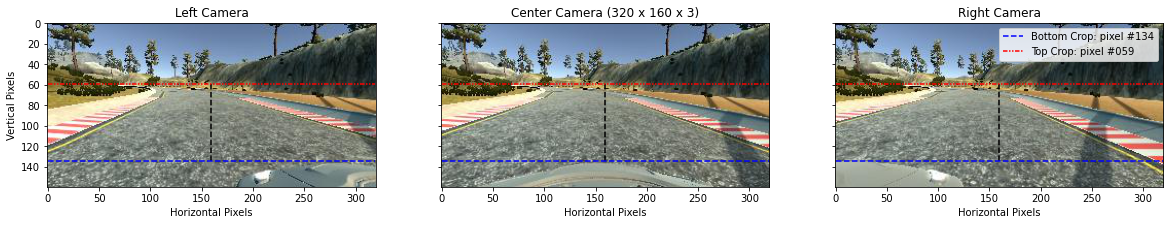

In [14]:
# Consider the distribution of the target: Sale Price. 
# Notice how the distribution approaches Normal after a log transfromation
fig, (ax0, ax1 , ax2) = plt.subplots( nrows=1, ncols=3, sharey=True,  figsize=(20, 4) )

# Plot params
origin = 0
width = IMAGE_WIDTH - 1 # Account for zero indexing
height = IMAGE_HEIGHT - 1 # Account for zero indexing
crop_top = height - 100 # 0 thru 59 croppped in training
crop_btm = height - 25 #Last 25 rows cropped in training
densely_dashdotdotted = (0, (3, 1, 1, 1, 1, 1))

ax0.imshow(test_image_l);
ax1.imshow(test_image_c);
ax2.imshow(test_image_r);

ax0.set( xlabel='Horizontal Pixels', title='Left Camera');
ax1.set( xlabel='Horizontal Pixels', title='Center Camera (320 x 160 x 3)');
ax2.set( xlabel='Horizontal Pixels', title='Right Camera');

ax0.set( ylabel='Vertical Pixels', title='Left Camera');
#ax1.set( ylabel='Vertical Pixels', title='Center Camera');
#ax2.set( ylabel='Vertical Pixels', title='Right Camera');

ax0.vlines(x=height, ymin=crop_btm, ymax=crop_top, colors='k', linestyles='--');
ax0.hlines(y=crop_btm, xmin=origin, xmax=width, colors='b', linestyles='--');
ax0.hlines(y=crop_top, xmin=origin, xmax=width, colors='r', linestyles=densely_dashdotdotted);

ax1.vlines(x=height, ymin=crop_btm, ymax=crop_top, colors='k', linestyles='--');
ax1.hlines(y=crop_btm, xmin=origin, xmax=width, colors='b', linestyles='--');
ax1.hlines(y=crop_top, xmin=origin, xmax=width, colors='r', linestyles=densely_dashdotdotted);


# crop(image) utils.py function removes the sky at the top and the car front at the bottom
top =  'Top Crop: pixel #059'
bttm = 'Bottom Crop: pixel #134'

ax2.vlines(x=height, ymin=crop_btm, ymax=crop_top, colors='k', linestyles='--');
ax2.hlines(y=crop_btm, xmin=origin, xmax=width, colors='b', linestyles='--', label=bttm);
ax2.hlines(y=crop_top, xmin=origin, xmax=width, colors='r', linestyles=densely_dashdotdotted, label=top);

#ax0.legend();
#ax1.legend();
ax2.legend();

In [15]:
# EXAMPLE: off-road left
image_num = 220
# File path for each of the three cameras
data_dir_c = X[image_num][0][:-28]
data_dir_l = X[image_num][1][:-28]
data_dir_r = X[image_num][2][:-28]
print(data_dir_c)
print(data_dir_l)
print(data_dir_r)

# First image on Oct 26, 2020 at 4:15:35.712 PST
image_file = X[image_num][0][-28:]
image_file

test_image_c = load_image(data_dir_c, image_file)
test_image_l = load_image(data_dir_l, image_file)
test_image_r = load_image(data_dir_r, image_file)
print(test_image_c.shape)
print(test_image_l.shape)
print(test_image_r.shape)

C:\Users\bgrif\Desktop\dsi\IMG\center
C:\Users\bgrif\Desktop\dsi\IMG\left
C:\Users\bgrif\Desktop\dsi\IMG\right
(160, 320, 3)
(160, 320, 3)
(160, 320, 3)


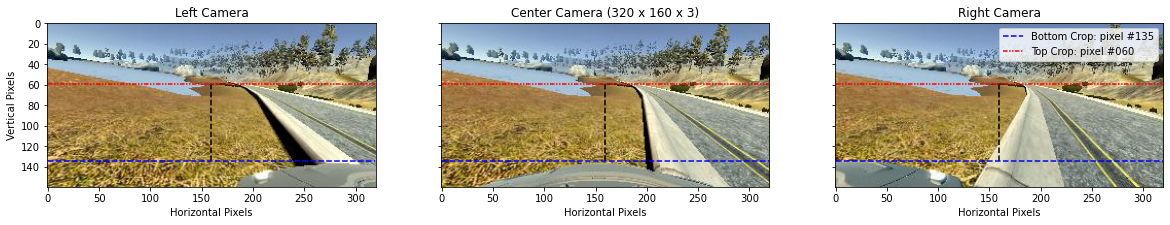

In [16]:
# Consider the distribution of the target: Sale Price. 
# Notice how the distribution approaches Normal after a log transfromation
fig, (ax0, ax1 , ax2) = plt.subplots( nrows=1, ncols=3, sharey=True,  figsize=(20, 4) )

# Plot params
origin = 0
width = IMAGE_WIDTH - 1 # Account for zero indexing
height = IMAGE_HEIGHT - 1 # Account for zero indexing
crop_top = height - 100 # 0 thru 59 croppped in training
crop_btm = height - 25 #Last 25 rows cropped in training
densely_dashdotdotted = (0, (3, 1, 1, 1, 1, 1))

ax0.imshow(test_image_l);
ax1.imshow(test_image_c);
ax2.imshow(test_image_r);

ax0.set( xlabel='Horizontal Pixels', title='Left Camera');
ax1.set( xlabel='Horizontal Pixels', title='Center Camera (320 x 160 x 3)');
ax2.set( xlabel='Horizontal Pixels', title='Right Camera');

ax0.set( ylabel='Vertical Pixels', title='Left Camera');
#ax1.set( ylabel='Vertical Pixels', title='Center Camera');
#ax2.set( ylabel='Vertical Pixels', title='Right Camera');

ax0.vlines(x=height, ymin=crop_btm, ymax=crop_top, colors='k', linestyles='--');
ax0.hlines(y=crop_btm, xmin=origin, xmax=width, colors='b', linestyles='--');
ax0.hlines(y=crop_top, xmin=origin, xmax=width, colors='r', linestyles=densely_dashdotdotted);

ax1.vlines(x=height, ymin=crop_btm, ymax=crop_top, colors='k', linestyles='--');
ax1.hlines(y=crop_btm, xmin=origin, xmax=width, colors='b', linestyles='--');
ax1.hlines(y=crop_top, xmin=origin, xmax=width, colors='r', linestyles=densely_dashdotdotted);


# crop(image) utils.py function removes the sky at the top and the car front at the bottom
top =  'Top Crop: pixel #060'
bttm = 'Bottom Crop: pixel #135'

ax2.vlines(x=height, ymin=crop_btm, ymax=crop_top, colors='k', linestyles='--');
ax2.hlines(y=crop_btm, xmin=origin, xmax=width, colors='b', linestyles='--', label=bttm);
ax2.hlines(y=crop_top, xmin=origin, xmax=width, colors='r', linestyles=densely_dashdotdotted, label=top);

#ax0.legend();
#ax1.legend();
ax2.legend();